<a href="https://colab.research.google.com/github/farrukh602/Deep-Learning-Course/blob/main/ResNet_Like_Architecture__from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries and CIFAR10 dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
# import
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# Doing one hot encoding:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=None)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=None)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

170498071/170498071 [==============================] - 6s 0us/step


# Make the model

In [ ]:
from functools import partial
import tensorflow as tf
tf.keras.backend.clear_session()
conv2d = partial(
tf.keras.layers.Conv2D, kernel_size=5, strides=1, activation='relu', padding="same",kernel_regularizer=tf.keras.regularizers.l2(1e-6)
)
max_pool = partial(tf.keras.layers.MaxPooling2D, pool_size=(2,2), strides=2,padding="same",
# kernel_regularizer=regularizers.l2(1e-4),

)

dropout = partial(tf.keras.layers.Dropout(0.2))
# Input layer
input_layer= tf.keras.layers.Input(shape = (32,32,3))
conv = conv2d(filters = 64)(input_layer)
pool = max_pool()(conv)
pool = dropout(pool) # pool with droppout
batch_norm = tf.keras.layers.BatchNormalization()(pool)
# Block1
x=batch_norm # skipp connection
conv1 = conv2d(filters = 64)(x)
conv1 = dropout(conv1) # conv with droppout
batch_norm = tf.keras.layers.BatchNormalization()(conv1)
conv2 = conv2d(filters=64, activation=None)(x)
conv2 = dropout(conv2) # conv with droppout
batch_norm = tf.keras.layers.BatchNormalization()(conv2)
merged_output = tf.keras.layers.Add()([batch_norm, x]) # skip connection added
x = tf.keras.layers.Activation('relu')(merged_output) # activated output
# Block2
# x=batch_norm # skipp connection
conv3 = conv2d(filters = 64)(x)
conv3 = dropout(conv3) # conv with droppout
batch_norm = tf.keras.layers.BatchNormalization()(conv3)
conv4 = conv2d(filters=64, activation=None)(x)
conv4 = dropout(conv4) # conv with droppout
batch_norm = tf.keras.layers.BatchNormalization()(conv4)
merged_output = tf.keras.layers.Add()([batch_norm, x]) # skip connection added
x = tf.keras.layers.Activation('relu')(merged_output) # activated output
# Block3
# x=batch_norm # skipp connection
conv5 = conv2d(filters = 64)(x)
conv5 = dropout(conv5) # conv with droppout
batch_norm = tf.keras.layers.BatchNormalization()(conv5)
conv6 = conv2d(filters=64, activation=None)(x)
conv6 = dropout(conv6) # conv with droppout
batch_norm = tf.keras.layers.BatchNormalization()(conv6)
merged_output = tf.keras.layers.Add()([batch_norm, x]) # skip connection added
x = tf.keras.layers.Activation('relu')(merged_output) # activated output
# Block4
# x=batch_norm # skipp connection
conv7 = conv2d(filters = 64)(x)
conv7 = dropout(conv7) # conv with droppout
batch_norm = tf.keras.layers.BatchNormalization()(conv7)
merged_output = tf.keras.layers.Add()([batch_norm, x]) # skip connection added
x = tf.keras.layers.Activation('relu')(merged_output) # activated output
cnn_output = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2,padding="same")(x)
cnn_output = dropout(cnn_output)
########### Flatten and add dense layer
flattened_output = tf.keras.layers.Flatten()(cnn_output)
output_layer = tf.keras.layers.Dense(units=10, activation='softmax')(flattened_output)
########### Create the model
model = tf.keras.Model(inputs=input_layer, outputs = output_layer)

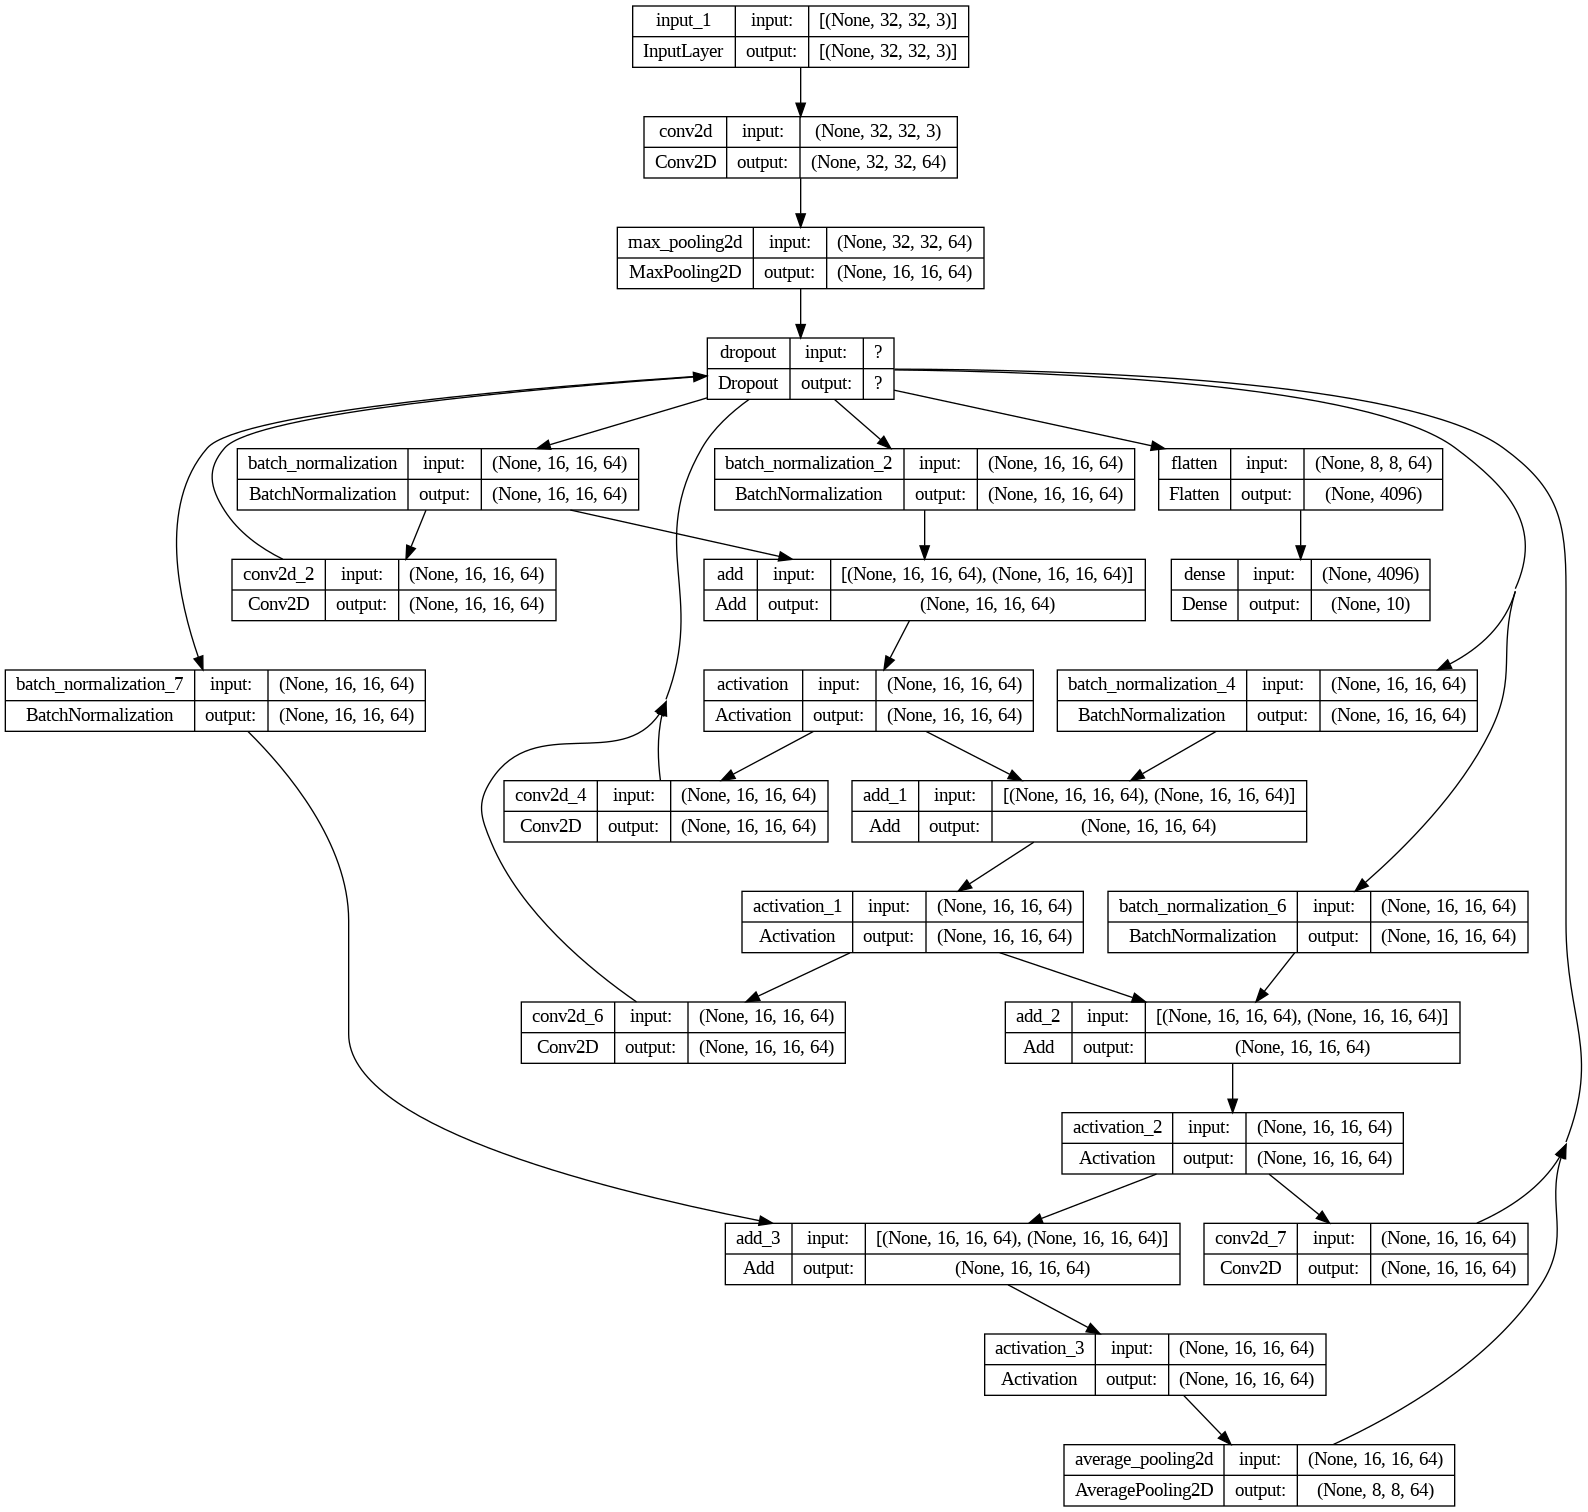

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
len(model.trainable_variables)

22

# Compile and train the model

In [ ]:
tf.keras.backend.clear_session()
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(momentum=0.9,
nesterov=True,),
metrics=['accuracy'])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
filepath='model_checkpoint.h5',
save_best_only=True, # Save only the best model based on validation loss
monitor='val_loss', # Monitor validation loss
mode='min', # Save when validation loss is minimized
verbose=1
)
history = model.fit(
X_train, y_train,
epochs=12,
validation_data=(X_valid, y_valid),
verbose=1,
# callbacks=[checkpoint_callback]
)

Epoch 1/12
1250/1250 [==============================] - 23s 10ms/step - loss: 1.9068 - accuracy: 0.4103 - val_loss: 1.4065 - val_accuracy: 0.5113
Epoch 2/12
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2678 - accuracy: 0.5508 - val_loss: 1.3434 - val_accuracy: 0.5359
Epoch 3/12
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1085 - accuracy: 0.6115 - val_loss: 1.3284 - val_accuracy: 0.5523
Epoch 4/12
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0090 - accuracy: 0.6418 - val_loss: 1.4336 - val_accuracy: 0.5469
Epoch 5/12
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9263 - accuracy: 0.6763 - val_loss: 1.1276 - val_accuracy: 0.6187
Epoch 6/12
1250/1250 [==============================] - 12s 10ms/step - loss: 0.8637 - accuracy: 0.6963 - val_loss: 1.1703 - val_accuracy: 0.6279
Epoch 7/12
1250/1250 [==============================] - 12s 10ms/step - loss: 0.8060 - accuracy: 0.7193 - val_loss: 0.9827 -

In [ ]:
#Saving the model
model.save("/content/drive/MyDrive/Deep Learning Course/Assignments/model_at_epochs_12.keras")

# Evaluating model on the test set

In [ ]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9300 - accuracy: 0.6924


In [ ]:
# Classification Report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1000
           1       0.92      0.74      0.82      1000
           2       0.57      0.66      0.61      1000
           3       0.48      0.61      0.53      1000
           4       0.58      0.77      0.66      1000
           5       0.82      0.33      0.47      1000
           6       0.79      0.74      0.77      1000
           7       0.88      0.65      0.75      1000
           8       0.66      0.91      0.77      1000
           9       0.75      0.84      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.72      0.69      0.69     10000
weighted avg       0.72      0.69      0.69     10000



# Make predictions

In [ ]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0

# Check the predictions

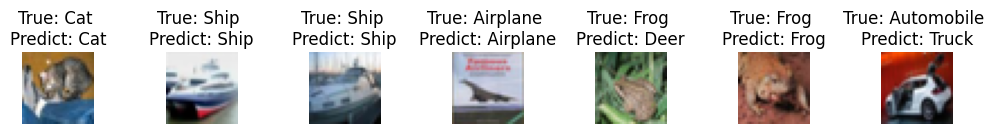

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(8):
  if i in [7,12,17,20,24]:
    continue
  axes[i].imshow(X_test[i])
  axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace=1)

# Check the wrong predictions

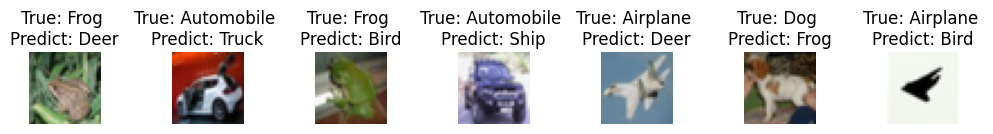

In [ ]:
fig, axes = plt.subplots(1,7, figsize=(12,12))
axes = axes.ravel()
miss_pred = np.where(y_pred != y_true)[0]
for i in np.arange(7):
  axes[i].imshow(X_test[miss_pred[i]])
  axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[miss_pred[i]]], labels[y_pred[miss_pred[i]]]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace=1)